<a href="https://colab.research.google.com/github/siva-Parvathi-M/Healthcare-Readmission-Mortality/blob/main/hospital_readmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the Dataset**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Readmissions_and_Deaths_-_Hospital.csv")

# Preview
print(df.head())
print(df.info())

   index  Provider ID             Hospital Name                   Address  \
0      0       230100  TAWAS ST JOSEPH HOSPITAL               200 HEMLOCK   
1      1       230121       MEMORIAL HEALTHCARE      826 WEST KING STREET   
2      2       230118      HURON MEDICAL CENTER  1100 SOUTH VAN DYKE ROAD   
3      3       230121       MEMORIAL HEALTHCARE      826 WEST KING STREET   
4      4       230133  OTSEGO MEMORIAL HOSPITAL          825 N CENTER AVE   

         City State  ZIP Code County Name  Phone Number  \
0  TAWAS CITY    MI     48764       IOSCO    9893629301   
1      OWOSSO    MI     48867  SHIAWASSEE    9897235211   
2     BAD AXE    MI     48413       HURON    9892699521   
3      OWOSSO    MI     48867  SHIAWASSEE    9897235211   
4     GAYLORD    MI     49735      OTSEGO    9897312100   

                                        Measure Name          Measure ID  \
0  Rate of readmission after discharge from hospi...  READM_30_HOSP_WIDE   
1     Rate of readmission afte

**Clean & Prepare the Data**

In [ ]:
# Extract latitude and longitude only if they exist
df['Latitude'] = df['Location'].str.extract(r'\(([-+]?[0-9]*\.?[0-9]+),')[0]
df['Longitude'] = df['Location'].str.extract(r',\s*([-+]?[0-9]*\.?[0-9]+)\)')[0]

# Convert to numeric safely
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

**Feature Engineering**

In [ ]:
# Hospital type: Readmission vs Mortality
df['Measure_Type'] = df['Measure ID'].apply(lambda x: 'Readmission' if 'READM' in x else 'Mortality')

# Performance category
df['Performance'] = df['Compared to National'].map({
    'Better than the National Rate': 'Better',
    'No Different than the National Rate': 'Same',
    'Worse than the National Rate': 'Worse'
})

# Length of measurement period (in days)
df['Measure_Duration'] = (df['Measure End Date'] - df['Measure Start Date']).dt.days

**Exploratory Data Analysis (EDA)**

In [ ]:
# Lowest readmission scores
readmission = df[df['Measure_Type']=='Readmission']
print(readmission[['Hospital Name','City','State','Score']].sort_values('Score').head(10))

# Average mortality by state
mortality = df[df['Measure_Type']=='Mortality']
print(mortality.groupby('State')['Score'].mean().sort_values(ascending=False).head(10))

                               Hospital Name           City State  Score
27920              HOAG ORTHOPEDIC INSTITUTE         IRVINE    CA    2.4
12717                           REX HOSPITAL        RALEIGH    NC    2.9
26092  PROVIDENCE SAINT JOHN'S HEALTH CENTER   SANTA MONICA    CA    2.9
30124                   BEEBE MEDICAL CENTER          LEWES    DE    2.9
5333    FREEMAN HEALTH SYSTEM - FREEMAN WEST         JOPLIN    MO    3.0
40759              KANSAS MEDICAL CENTER LLC        ANDOVER    KS    3.0
30957             SARASOTA MEMORIAL HOSPITAL       SARASOTA    FL    3.0
6960                COMMUNITY MEDICAL CENTER       MISSOULA    MT    3.2
41758               HARDIN MEMORIAL HOSPITAL  ELIZABETHTOWN    KY    3.2
54790     VHS HARLINGEN HOSPITAL COMPANY LLC      HARLINGEN    TX    3.2
State
MP    17.000000
GU    15.900000
VI    14.977778
PR    13.819388
WY    13.417143
NE    13.410577
VT    13.321875
OR    13.310776
IA    13.304249
MT    13.299130
Name: Score, dtype: float64


**Export Clean Data for Visualization**

In [ ]:
df.to_csv("cleaned_us_healthcare.csv", index=False)

**Exploratory Data Analysis (EDA) in Python**

**Readmission vs Mortality Distribution**

/tmp/ipython-input-3014811526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Measure_Type', palette='Set2')


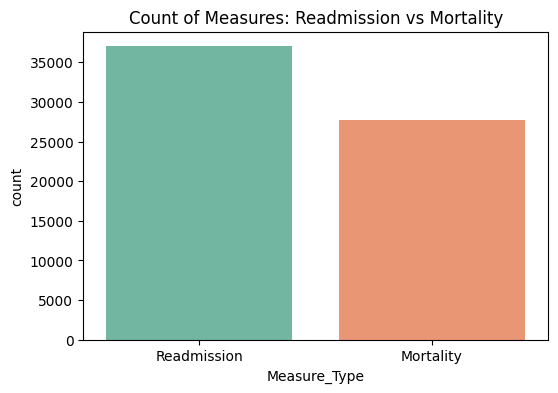

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of measure types
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Measure_Type', palette='Set2')
plt.title("Count of Measures: Readmission vs Mortality")
plt.show()

**Performance vs National Rate**

/tmp/ipython-input-2231632318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Performance', palette='coolwarm')


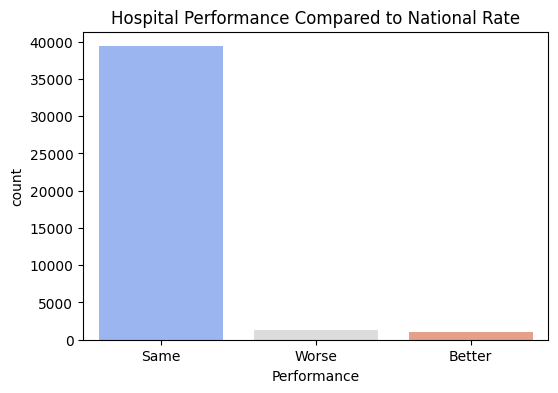

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Performance', palette='coolwarm')
plt.title("Hospital Performance Compared to National Rate")
plt.show()

**Top 10 States by Number of Records**

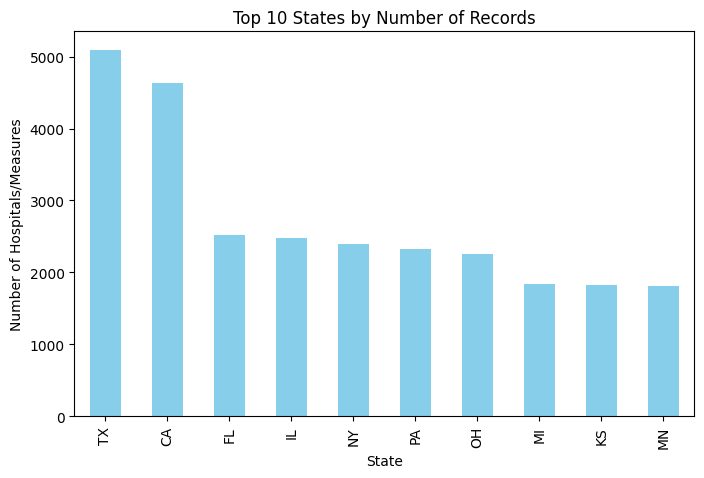

In [ ]:
df['State'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Top 10 States by Number of Records")
plt.ylabel("Number of Hospitals/Measures")
plt.show()

**Average Scores by State**

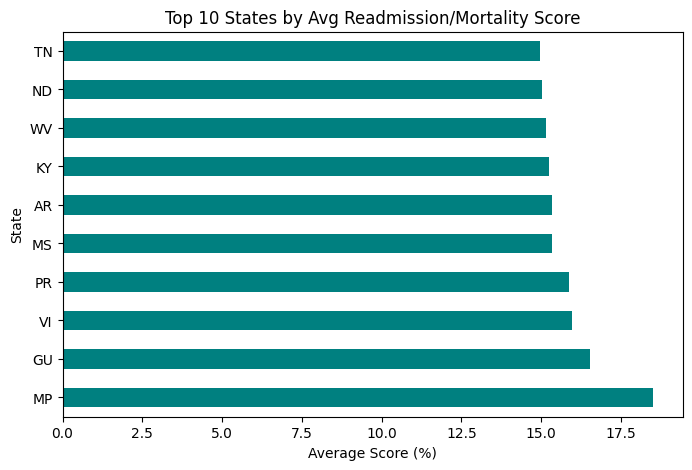

In [ ]:
state_scores = df.groupby('State')['Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
state_scores.plot(kind='barh', color='teal')
plt.title("Top 10 States by Avg Readmission/Mortality Score")
plt.xlabel("Average Score (%)")
plt.show()

**Map Preview (if Lat/Long available)**

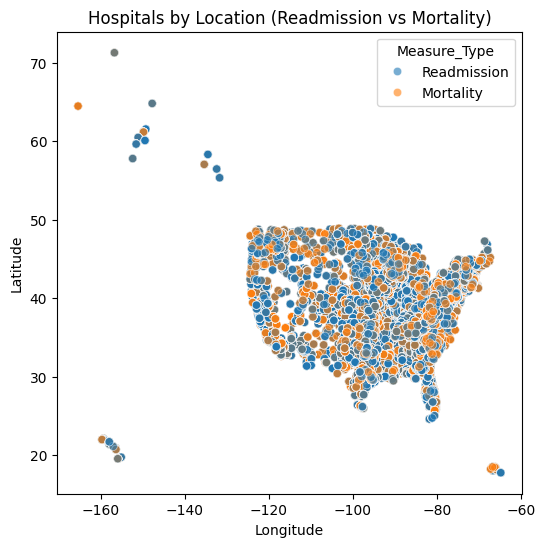

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Measure_Type', data=df, alpha=0.6)
plt.title("Hospitals by Location (Readmission vs Mortality)")
plt.show()

In [ ]:
# Step 5: Export Cleaned Dataset for Visualization

# Define export file path
output_path = "/content/cleaned_healthcare_data.csv"

# Save DataFrame to CSV
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: /content/cleaned_healthcare_data.csv


**Download the cleaned dataset**

In [ ]:
from google.colab import files
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>